In [ ]:
# NOTE: this only works if jupyter session is started in root dir of
# the repo. Definitely need to do something better
%cd ~/MGGG/VoteKit/
from src.votekit.ballot_generator import ImpartialCulture
#from votekit.pref_profile import PreferenceProfile
import matplotlib.pyplot as plt
from math import factorial

/home/willithg/MGGG/VoteKit
/home/willithg/MGGG/VoteKit


In [15]:
## setup the classes

n_cands = 15
cands = [chr(ord('a')+i) for i in range(n_cands)]
print("candidates: ", cands)

ic = ImpartialCulture(candidates=cands)

candidates:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']


In [12]:
## Collect the distribution for the np-optimized method (shuffles the list of cands in place k times)
num_ballots = int(1000)
bals_MCMC = ic.generate_profile_MCMC_optimized(num_ballots)
bals_NP = ic.generate_profile_IC_optimized(num_ballots)


Text(0, 0.5, 'Deviation from uniform')

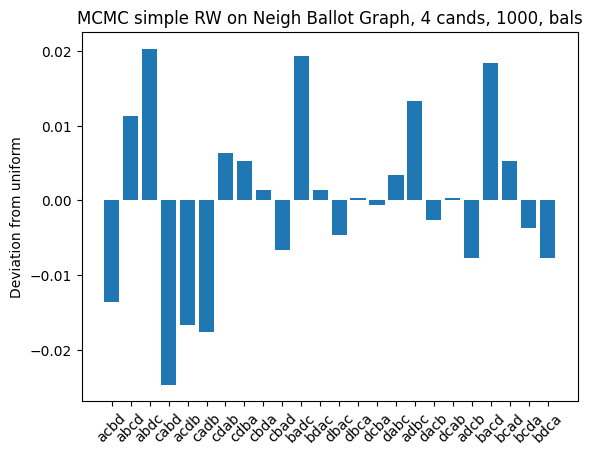

In [13]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_MCMC.ballots]

total_weight_MCMC = sum(bal_weights_MCMC)
ev = 1/factorial(n_cands)
plt.bar(x = bal_labels_MCMC, height = [w/total_weight_MCMC - ev for w in bal_weights_MCMC])
plt.xticks(rotation=45)
plt.title(f"MCMC simple RW on Neigh Ballot Graph, {n_cands} cands, {num_ballots}, bals")
plt.ylabel("Deviation from uniform")

Text(0, 0.5, 'Deviation from uniform')

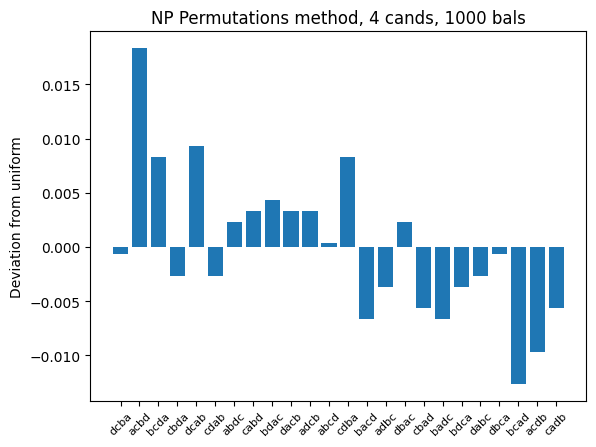

In [14]:
ballot_rankings_NP = [bal.ranking for bal in bals_NP.ballots]
bal_labels_NP = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_NP]
bal_weights_NP = [int(bal.weight) for bal in bals_NP.ballots]

total_weight_NP = sum(bal_weights_NP)
ev = 1/factorial(n_cands)
plt.bar(x = bal_labels_NP, height = [w/total_weight_NP - ev for w in bal_weights_NP])
plt.xticks(rotation=45, fontsize=8)
#plt.tight_layout()
plt.title(f"NP Permutations method, {n_cands} cands, {num_ballots} bals")
plt.ylabel("Deviation from uniform")

In [26]:
# Compare deviate statistics
total_weight_NP = sum(bal_weights_NP)
total_weight_MCMC = sum(bal_weights_MCMC)
ev = 1/factorial(n_cands)
deviation_from_uniform_NP = [w / total_weight_NP - ev for w in bal_weights_NP]
deviation_from_uniform_MCMC = [w / total_weight_MCMC - ev for w in bal_weights_MCMC]

print("num cands =", n_cands)
print("num ballots =", num_ballots)
print("Avg deviation from uniform: ")
print("MCMC: ", sum(deviation_from_uniform_MCMC)/len(deviation_from_uniform_MCMC))
print("NP: ", sum(deviation_from_uniform_NP)/len(deviation_from_uniform_NP))

num cands = 12
num ballots = 1000
Avg deviation from uniform: 
MCMC:  0.0011428550551814442
NP:  0.041666664578990965


In [10]:
## Run stats
k = int(10e3) 
print(f"Runtimes for {k} ballots and {n_cands} candidates")
print("MCMC: ")
%timeit ic.generate_profile_MCMC_optimized(k)
print("NP: ")
%timeit ic.generate_profile_IC_optimized(k)

Runtimes for 10000 ballots and 12 candidates
MCMC: 
396 ms ± 3.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
NP: 
431 ms ± 8.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Memory overhead stats
